In [32]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install gym

In [2]:
!git clone https://github.com/FlemingDL/gym_fleming.git

!pip install -e gym_fleming

Cloning into 'gym_fleming'...
remote: Enumerating objects: 99, done.
remote: Counting objects: 100% (99/99), done.
remote: Compressing objects: 100% (72/72), done.
remote: Total 99 (delta 37), reused 86 (delta 24), pack-reused 0
Unpacking objects: 100% (99/99), done.
Obtaining file:///content/gym_fleming
  Running setup.py develop for gym-fleming


In [0]:
import sys
from contextlib import closing
from six import StringIO
from gym import utils
from gym.envs.toy_text import discrete
import numpy as np
from collections import defaultdict
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import gym
import gym_fleming
from gym import wrappers

In [2]:

# env = gym.make('taxi_fleming-v0')
# env = gym.wrappers.Monitor(env, "./drive/My Drive/Colab Notebooks/RL Project/double_Q_5x5",  video_callable=lambda episode_id: True, force=True)
env = gym.make('taxi_fleming-10x10-v0')
# env = gym.wrappers.Monitor(env, "./drive/My Drive/Colab Notebooks/RL Project/double_Q_10x10",  video_callable=lambda episode_id: True, force=True)
# env = gym.make('taxi_fleming-15x15-v0')
# env = gym.wrappers.Monitor(env, "./drive/My Drive/Colab Notebooks/RL Project/double_Q_15x15",  video_callable=lambda episode_id: True, force=True)
# env = gym.make('taxi_fleming-20x20-v0')
# env = gym.wrappers.Monitor(env, "./drive/My Drive/Colab Notebooks/RL Project/double_Q_20x20",  video_callable=lambda episode_id: True, force=True)

#  env = gym.wrappers.Monitor(env, directory, video_callable=lambda episode_id: episode_id%10==0)
n_state = env.observation_space.n
print(n_state)

n_action = env.action_space.n
print(n_action)

2000
6


In [3]:
env.render()


+-------------------+
|R: | : : : : | : :G|
| : | : : : : | : : |
| : : : : : : : : : |
| | : | : : | : | : |
| | : | : : | : | : |
| : | : : : : | : : |
| : | : : : : | : : |
| : : : : : : : : : |
| | : | : : | : | : |
|Y| : | : : | : |B: |
+-------------------+



In [0]:

# class TaxiEnv(discrete.DiscreteEnv):
#     """
#     The Taxi Problem
#     from "Hierarchical Reinforcement Learning with the MAXQ Value Function Decomposition"
#     by Tom Dietterich
#     Description:
#     There are four designated locations in the grid world indicated by R(ed), G(reen), Y(ellow), and B(lue). When the episode starts, the taxi starts off at a random square and the passenger is at a random location. The taxi drives to the passenger's location, picks up the passenger, drives to the passenger's destination (another one of the four specified locations), and then drops off the passenger. Once the passenger is dropped off, the episode ends.
#     Observations: 
#     There are 500 discrete states since there are 25 taxi positions, 5 possible locations of the passenger (including the case when the passenger is in the taxi), and 4 destination locations. 
    
#     Passenger locations:
#     - 0: R(ed)
#     - 1: G(reen)
#     - 2: Y(ellow)
#     - 3: B(lue)
#     - 4: in taxi
    
#     Destinations:
#     - 0: R(ed)
#     - 1: G(reen)
#     - 2: Y(ellow)
#     - 3: B(lue)
        
#     Actions:
#     There are 6 discrete deterministic actions:
#     - 0: move south
#     - 1: move north
#     - 2: move east 
#     - 3: move west 
#     - 4: pickup passenger
#     - 5: dropoff passenger
    
#     Rewards: 
#     There is a reward of -1 for each action and an additional reward of +20 for delivering the passenger. There is a reward of -10 for executing actions "pickup" and "dropoff" illegally.
    
#     Rendering:
#     - blue: passenger
#     - magenta: destination
#     - yellow: empty taxi
#     - green: full taxi
#     - other letters (R, G, Y and B): locations for passengers and destinations
    
#     state space is represented by:
#         (taxi_row, taxi_col, passenger_location, destination)
#     """
#     metadata = {'render.modes': ['human', 'ansi']}

In [0]:
>>> def double_q_learning(env, gamma, n_episode, alpha):
...     """
...     Obtain the optimal policy with off-policy double 
        Q-learning method
...     @param env: OpenAI Gym environment
...     @param gamma: discount factor
...     @param n_episode: number of episodes
...     @return: the optimal Q-function, and the optimal policy
...     """
...     n_action = env.action_space.n
...     n_state = env.observation_space.n
...     Q1 = torch.zeros(n_state, n_action)
...     Q2 = torch.zeros(n_state, n_action)
...     frames =[]
...     for episode in range(n_episode):
...         state = env.reset()
...         is_done = False
...         while not is_done:
# ...             env.render()
# ...             env.close()
...             action = epsilon_greedy_policy(state, Q1 + Q2)
...             next_state, reward, is_done, info = env.step(action)
...             if (torch.rand(1).item() < 0.5):
...                 best_next_action = torch.argmax(Q1[next_state])
...                 td_delta = reward + gamma * Q2[next_state][best_next_action]  - Q1[state][action]
...                 Q1[state][action] += alpha * td_delta
...             else:
...                 best_next_action = torch.argmax(Q2[next_state])
...                 td_delta = reward + gamma * Q1[next_state][best_next_action] - Q2[state][action]
...                 Q2[state][action] += alpha * td_delta
...             length_episode[episode] += 1
...             total_reward_episode[episode] += reward
# ...             frames.append({'frame': env.render(mode='ansi'),'state': state,'action': action,'reward': reward})
...             if is_done:
...                 break
...             state = next_state
# ...     env.close()
...     policy = {}
...     Q = Q1 + Q2


...     for state in range(n_state):
...         policy[state] = torch.argmax(Q[state]).item()
...     return Q, policy#,frames

In [0]:
>>> def gen_epsilon_greedy_policy(n_action, epsilon):
        def policy_function(state, Q):
            probs = torch.ones(n_action) * epsilon / n_action
            best_action = torch.argmax(Q[state]).item()
            probs[best_action] += 1.0 - epsilon
            action = torch.multinomial(probs, 1).item()
            return action
        return policy_function

In [0]:
from IPython.display import clear_output
from time import sleep

def print_frames(frames):
    for i, frame in enumerate(frames):
        clear_output(wait=True)
        print(frame['frame'])
        print(f"Timestep: {i + 1}")
        print(f"State: {frame['state']}")
        print(f"Action: {frame['action']}")
        print(f"Reward: {frame['reward']}")
        sleep(.2)

In [0]:
>>> n_episode = 2000
>>> length_episode = [0] * n_episode
>>> total_reward_episode = [0] * n_episode

In [0]:
alpha_options = [0.4, 0.5, 0.6]
epsilon_options = [0.3, 0.1, 0.01]
gamma = 1

In [21]:
for alpha in alpha_options:
     for epsilon in epsilon_options:
         length_episode = [0] * n_episode
         total_reward_episode = [0] * n_episode
         epsilon_greedy_policy = gen_epsilon_greedy_policy(env.action_space.n, epsilon)
         double_q_learning(env, gamma, n_episode, alpha)
         reward_per_step = [reward/float(step) for 
                            reward, step in zip(
                        total_reward_episode, length_episode)]
         print('alpha: {}, epsilon: {}'.format(alpha, epsilon))
         print('Average reward over {} episodes: {}'.format(
            n_episode, sum(total_reward_episode) / n_episode))
         print('Average length over {} episodes: {}'.format(
            n_episode, sum(length_episode) / n_episode))
         print('Average reward per step over {} episodes: {}\n'.format(
            n_episode, sum(reward_per_step) / n_episode))

alpha: 0.4, epsilon: 0.3
Average reward over 2000 episodes: -551.523
Average length over 2000 episodes: 253.257
Average reward per step over 2000 episodes: -1.675820900604702

alpha: 0.4, epsilon: 0.1
Average reward over 2000 episodes: -491.55
Average length over 2000 episodes: 239.4765
Average reward per step over 2000 episodes: -1.3336794819924893

alpha: 0.4, epsilon: 0.01
Average reward over 2000 episodes: -465.1255
Average length over 2000 episodes: 229.6345
Average reward per step over 2000 episodes: -1.2292287674703932

alpha: 0.5, epsilon: 0.3
Average reward over 2000 episodes: -508.288
Average length over 2000 episodes: 226.0645
Average reward per step over 2000 episodes: -1.6844674676080467

alpha: 0.5, epsilon: 0.1
Average reward over 2000 episodes: -466.3115
Average length over 2000 episodes: 220.0115
Average reward per step over 2000 episodes: -1.3657729577401203

alpha: 0.5, epsilon: 0.01
Average reward over 2000 episodes: -447.132
Average length over 2000 episodes: 214.4

In [0]:
#10x10
>>> gamma = 1
>>> alpha = 0.6
>>> epsilon = 0.01
>>> epsilon_greedy_policy = gen_epsilon_greedy_policy(env.action_space.n, epsilon)
>>> five_try = ['one','two','three','four','five']
# >>> five_try = ['one']
>>> for i in five_try:
>>>   length_episode = [0] * n_episode
>>>   total_reward_episode = [0] * n_episode
>>>   optimal_Q, optimal_policy = double_q_learning(env, gamma, n_episode, alpha)
>>>   vars()["length_episode_"+i] = length_episode
>>>   vars()["total_reward_episode_"+i] = total_reward_episode

In [0]:
import pandas as pd


length_df = pd.DataFrame({'10x10_one' : length_episode_one ,
                   '10x10_two' : length_episode_two,
                   '10x10_three' : length_episode_three,
                   '10x10_four' : length_episode_four,
                   '10x10_five' : length_episode_five
                   }
                    )

reward_df = pd.DataFrame({'10x10_one' : total_reward_episode_one ,
                   '10x10_two' : total_reward_episode_two,
                   '10x10_three' : total_reward_episode_three,
                   '10x10_four' : total_reward_episode_four,
                   '10x10_five' : total_reward_episode_five
                   }
                    )


In [35]:
length_df

,10x10_one,10x10_two,10x10_three,10x10_four,10x10_five
0,734,2482,6203,1179,746
1,4313,809,1209,869,1239
2,2840,1489,623,3329,4075
3,1139,2204,1208,953,1252
4,1537,4092,4658,1777,1439
...,...,...,...,...,...
1995,24,25,16,17,22
1996,40,22,22,25,20
1997,30,24,35,22,19
1998,47,22,27,29,30


In [36]:
reward_df

,10x10_one,10x10_two,10x10_three,10x10_four,10x10_five
0,-2702,-7069,-17765,-4443,-2903
1,-12734,-2876,-4104,-3377,-4413
2,-7535,-5140,-2519,-10319,-10534
3,-4403,-5927,-3914,-2975,-4309
4,-3721,-11784,-12269,-4987,-3560
...,...,...,...,...,...
1995,-3,-4,5,4,-1
1996,-46,-1,-1,-4,1
1997,-9,-3,-32,-1,2
1998,-62,-1,-6,-8,-9


In [0]:
from google.colab import files
length_df.to_csv('10x10_length_result.csv') 
reward_df.to_csv('10x10_reward_result.csv') 
# files.download('filename.csv')



In [0]:
>>> gamma = 1
>>> alpha = 0.4
>>> epsilon = 0.1
>>> epsilon_greedy_policy = gen_epsilon_greedy_policy(env.action_space.n, epsilon)

In [0]:
>>> optimal_Q, optimal_policy = double_q_learning(env, gamma, n_episode, alpha)

In [0]:
# print_frames(frames)

In [0]:
length_episode_141 = length_episode
total_reward_episode_141 = total_reward_episode

Text(0, 0.5, 'Length')

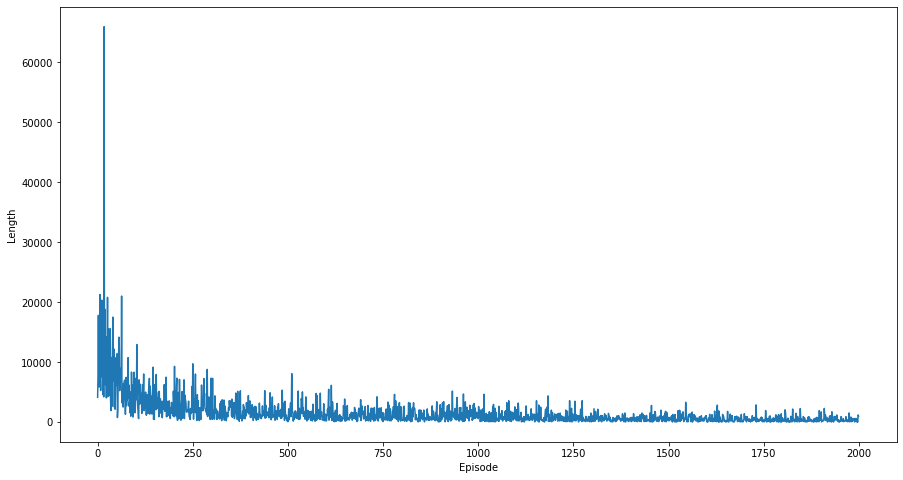

In [0]:
plt.figure(figsize=(15,8))
plt.plot(length_episode)
plt.xlabel('Episode')
plt.ylabel('Length')

Text(0, 0.5, 'Total reward')

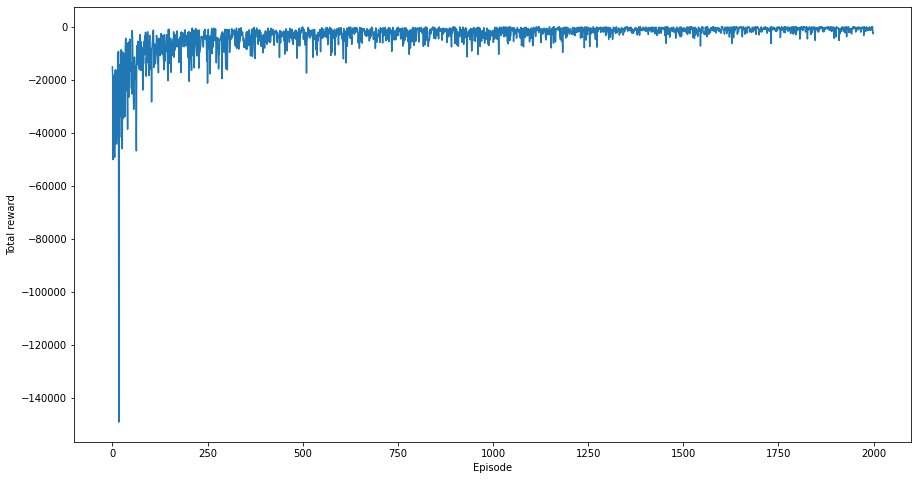

In [0]:
plt.figure(figsize=(15,8))
plt.plot(total_reward_episode)
plt.xlabel('Episode')
plt.ylabel('Total reward')

BOKEHHHHHHHHHHHHH

In [0]:
from bokeh.layouts import gridplot
from bokeh.plotting import figure, output_file, show
import numpy as np

from bokeh.io import show
from bokeh.layouts import column
from bokeh.models import ColumnDataSource, RangeTool
from bokeh.plotting import figure

In [0]:
Y=np.array(length_episode)
Y1=np.array(total_reward_episode)

In [0]:
TOOLS = "pan,wheel_zoom,box_zoom,reset,save,box_select"

In [0]:
p3 = figure(title="Episode length over time New Map_20x20", tools=TOOLS)

In [0]:

##p3.circle(range(0, 1000), Y, legend_label="")
p3.line(range(0, 2000), Y, legend_label="")

GlyphRenderer(id='1038', ...)

In [0]:
p3.legend.title = ''

In [0]:
output_file("lenght.html", title="Episode length over time New Map")

show(gridplot([p3], ncols=2, plot_width=1000, plot_height=400))  # open a browser

In [0]:
p4 = figure(title="Episode reward over time New Map_20x20", tools=TOOLS)

In [0]:
##p4.circle(range(0, 1000),Y1, legend_label="",color="orange")
p4.line(range(0, 2000),Y1, legend_label="",color="orange")

GlyphRenderer(id='1261', ...)

In [0]:
p4.legend.title = ''

In [0]:
output_file("reward.html", title="Episode length over time New Map")

show(gridplot([p4], ncols=2, plot_width=1000, plot_height=400))  # open a browser

TUNE

Gamma = 1, Alpha = 0.4, Epsilon = 0.4


144


In [0]:
>>> n_episode = 1000
>>> length_episode = [0] * n_episode
>>> total_reward_episode = [0] * n_episode

In [0]:
>>> gamma = 1
>>> alpha = 0.4
>>> epsilon = 0.4
>>> epsilon_greedy_policy = gen_epsilon_greedy_policy(env.action_space.n, epsilon)

In [0]:
>>> optimal_Q, optimal_policy = double_q_learning(env, gamma, n_episode, alpha)

In [0]:
length_episode_144 = length_episode
total_reward_episode_144 = total_reward_episode

In [0]:
plt.figure(figsize=(15,8))
plt.plot(length_episode)
plt.xlabel('Episode')
plt.ylabel('Length')

In [0]:
plt.figure(figsize=(15,8))
plt.plot(total_reward_episode)
plt.xlabel('Episode')
plt.ylabel('Total reward')

Gamma = 1, Alpha = 0.1, Epsilon = 0.4


114


In [0]:
>>> n_episode = 1000
>>> length_episode = [0] * n_episode
>>> total_reward_episode = [0] * n_episode

In [0]:
>>> gamma = 1
>>> alpha = 0.1
>>> epsilon = 0.4
>>> epsilon_greedy_policy = gen_epsilon_greedy_policy(env.action_space.n, epsilon)

In [0]:
>>> optimal_Q, optimal_policy = double_q_learning(env, gamma, n_episode, alpha)

In [0]:
length_episode_114 = length_episode
total_reward_episode_114 = total_reward_episode

In [0]:
plt.figure(figsize=(15,8))
plt.plot(length_episode)
plt.xlabel('Episode')
plt.ylabel('Length')

In [0]:
plt.figure(figsize=(15,8))
plt.plot(total_reward_episode)
plt.xlabel('Episode')
plt.ylabel('Total reward')

Gamma = 1, Alpha = 0.1, Epsilon = 0.1


111

In [0]:
>>> n_episode = 1000
>>> length_episode = [0] * n_episode
>>> total_reward_episode = [0] * n_episode

In [0]:
>>> gamma = 1
>>> alpha = 0.1
>>> epsilon = 0.1
>>> epsilon_greedy_policy = gen_epsilon_greedy_policy(env.action_space.n, epsilon)

In [0]:
>>> optimal_Q, optimal_policy = double_q_learning(env, gamma, n_episode, alpha)

In [0]:
length_episode_111 = length_episode
total_reward_episode_111 = total_reward_episode

In [0]:
plt.figure(figsize=(15,8))
plt.plot(length_episode)
plt.xlabel('Episode')
plt.ylabel('Length')

In [0]:
plt.figure(figsize=(15,8))
plt.plot(total_reward_episode)
plt.xlabel('Episode')
plt.ylabel('Total reward')

Length vs episode plot for :
141,144,111,114




In [0]:
plt.figure(figsize=(10,7))
plt.plot(length_episode_141, color='#1E1E1E')
plt.figure(figsize=(10,7))
plt.plot(length_episode_144, color='#1E1E1E')
plt.figure(figsize=(10,7))
plt.plot(length_episode_111, color='#1E1E1E')
plt.figure(figsize=(10,7))
plt.plot(length_episode_114, color='#1E1E1E')
plt.xlabel('Episode')
plt.ylabel('Length')

Total Reward vs episode plot for :
141,144,111,114

In [0]:
plt.figure(figsize=(10,7))
plt.plot(total_reward_episode_141, color='#1E1E1E')
plt.figure(figsize=(10,7))
plt.plot(total_reward_episode_144, color='#1E1E1E')
plt.figure(figsize=(10,7))
plt.plot(total_reward_episode_111, color='#1E1E1E')
plt.figure(figsize=(10,7))
plt.plot(total_reward_episode_114, color='#1E1E1E')
plt.xlabel('Episode')
plt.ylabel('Length')